In [1]:
import torch
import os
import pickle
from pytorch3d.ops import knn_points, knn_gather
import os.path as osp
import matplotlib.pyplot as plt
from glob import glob

## Visualize all the network inputs and outputs

### Get the input

In [2]:
output_root = '/home/shimingwang/workspace/sf_tv/sceneflow_tv_se/outputs'
output_folder =  'sf_voxel_model_overfitting_val_demo/25e5c600-36fe-3245-9cc0-40ef91620c22'

output_path = osp.join(output_root, output_folder)
print(output_path)
print
file_list = []
for file_name in glob(f'{output_path}/*.pkl'):
    file_list.append(file_name)

print(len(file_list))

/home/shimingwang/workspace/sf_tv/sceneflow_tv_se/outputs/sf_voxel_model_overfitting_val_demo/25e5c600-36fe-3245-9cc0-40ef91620c22
156


In [3]:
file_path = file_list[45]
print(file_path)

file_name = file_path.split('/')[-1]
print(file_name)

with open(file_path, 'rb') as f:
    outputs = pickle.load(f)

print(outputs.keys())   

/home/shimingwang/workspace/sf_tv/sceneflow_tv_se/outputs/sf_voxel_model_overfitting_val_demo/25e5c600-36fe-3245-9cc0-40ef91620c22/315966113760007000.pkl
315966113760007000.pkl
dict_keys(['input_batch', 'model_output', 'final_flow'])


In [4]:
input_batch = outputs['input_batch']
print(input_batch.keys())

model_output = outputs['model_output'] 
print(model_output.keys())

voting_vol = model_output['voting_vol']

print(voting_vol.shape)

dict_keys(['scene_id', 'timestamp', 'pc0', 'gm0', 'pose0', 'pc1', 'gm1', 'pose1', 'flow', 'flow_is_valid', 'flow_category_indices', 'ego_motion', 'origin_pc0'])
dict_keys(['pseudoimages_src', 'pseudoimages_dst', 'pseudoimages_grid', 'feats_voxel_src', 'feats_voxel_dst', 'voxels_src', 'voting_vol', 'points_src_offset', 'points_src_voxel_idx', 'flow', 'pc0_points_lst', 'pc1_points_lst', 'pc0_valid_point_idxes', 'pc1_valid_point_idxes', 'pose_flow'])
torch.Size([11190, 34, 34])


In [13]:
print('pc0:', input_batch['pc0'].shape)
print('pc1:', input_batch['pc1'].shape)
print('gt_flow:', input_batch['flow'].shape)  
print('voting vol:', model_output['voting_vol'].shape)
print('points_src_voxel:', model_output['points_src_voxel_idx'].shape)
print('pc0_valid_pst_idx:', model_output['pc0_valid_point_idxes'].shape)
print('pc0_points_lst:', model_output['pc0_points_lst'].shape)
print('points_src_offsets:', model_output['points_src_offset'].shape)

print(model_output['pc0_valid_point_idxes'][:10], model_output['pc0_valid_point_idxes'].max())
print(model_output['points_src_voxel_idx'][:10], model_output['points_src_voxel_idx'].max())

pc0: torch.Size([69710, 3])
pc1: torch.Size([70018, 3])
gt_flow: torch.Size([95219, 3])
voting vol: torch.Size([11190, 34, 34])
points_src_voxel: torch.Size([43084])
pc0_valid_pst_idx: torch.Size([42686])
pc0_points_lst: torch.Size([42686, 3])
points_src_offsets: torch.Size([43084, 3])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], device='cuda:0') tensor(69709, device='cuda:0')
tensor([9095., 9596., 9621., 9122., 9110., 9648., 9647., 9136., 9233., 9726.],
       device='cuda:0') tensor(11091., device='cuda:0')


In [25]:
points_src_offsets = model_output['points_src_offset']
points_src_voxel = model_output['points_src_voxel_idx']

print(points_src_offsets.shape)
print(points_src_offsets[:42686,:])

print(points_src_voxel.shape)
print(points_src_voxel[42684:43084])

torch.Size([43084, 3])
tensor([[-0.0506,  0.0739, -1.5147],
        [ 0.0552,  0.0867, -0.5907],
        [-0.0081, -0.0200,  0.5889],
        ...,
        [-0.0142, -0.0713,  0.4264],
        [ 0.0897, -0.0399, -0.4811],
        [ 0.0195,  0.0443,  2.8405]], device='cuda:0')
torch.Size([43084])
tensor([ 2.7660e+03,  6.1500e+02, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        -1.0000e+00, -1.0000e+00, -1.0000e+00, 

In [6]:
flow = input_batch['flow']

flow = flow[model_output['pc0_valid_point_idxes']]
pose_flow = model_output['pose_flow'][model_output['pc0_valid_point_idxes']]
print(flow.shape)
print(pose_flow.shape)  


gt_flow = flow - pose_flow

torch.Size([42686, 3])
torch.Size([42686, 3])


### Visualize the point clouds

In [7]:
import numpy as np

In [8]:
%matplotlib inline
def visual_pc(pc,
              eval_range=54):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8), tight_layout=True)
    ax.set_facecolor('white')
    ax.tick_params(left = False,
                right = False ,
                labelleft = False ,
                labelbottom = False,
                bottom = False)

    dists = np.sqrt(np.sum(pc[:, :2] ** 2, axis=1))
    colors = np.minimum(1, dists / eval_range)
    ax.scatter(pc[ :,0], pc[ :,1], c=colors, cmap='viridis', s=0.2)

    # Show ego vehicle.
    ax.plot(0, 0, 'x', color='black')
    axes_limit = eval_range  # Slightly bigger to include boxes that extend beyond the range.
    ax.set_xlim(-axes_limit, axes_limit)
    ax.set_ylim(-axes_limit, axes_limit)
    
    plt.show()

In [9]:
pc_src = input_batch['pc0']
ego_flow = model_output['pose_flow']

pc_src_emc = pc_src + ego_flow

valid_pc = model_output['pc0_points_lst']

print(pc_src_emc.shape)
print(valid_pc.shape)

torch.Size([69710, 3])
torch.Size([42686, 3])


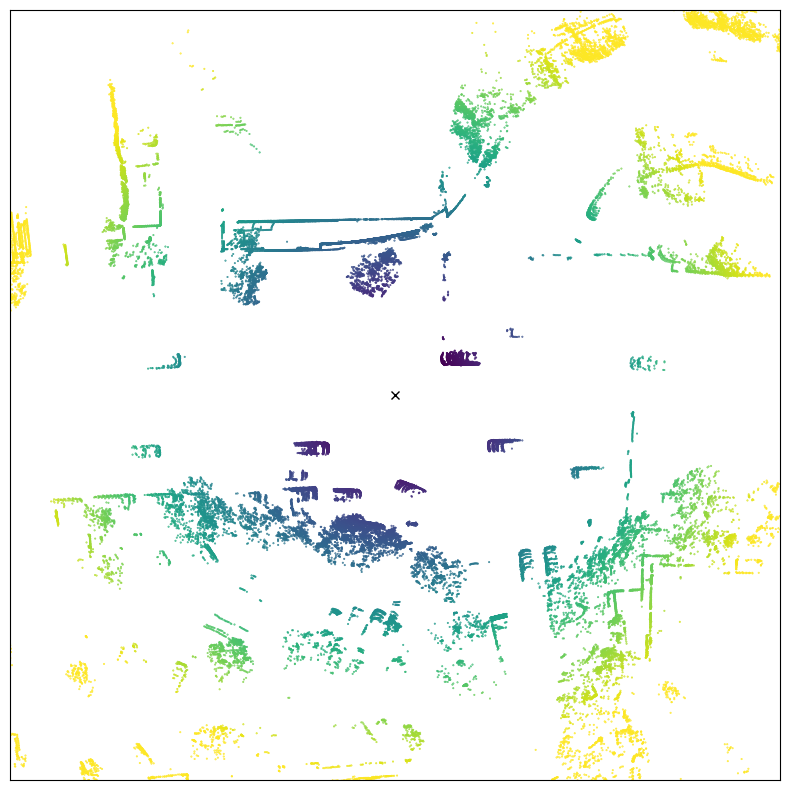

In [10]:
visual_pc(pc_src_emc.cpu().numpy())

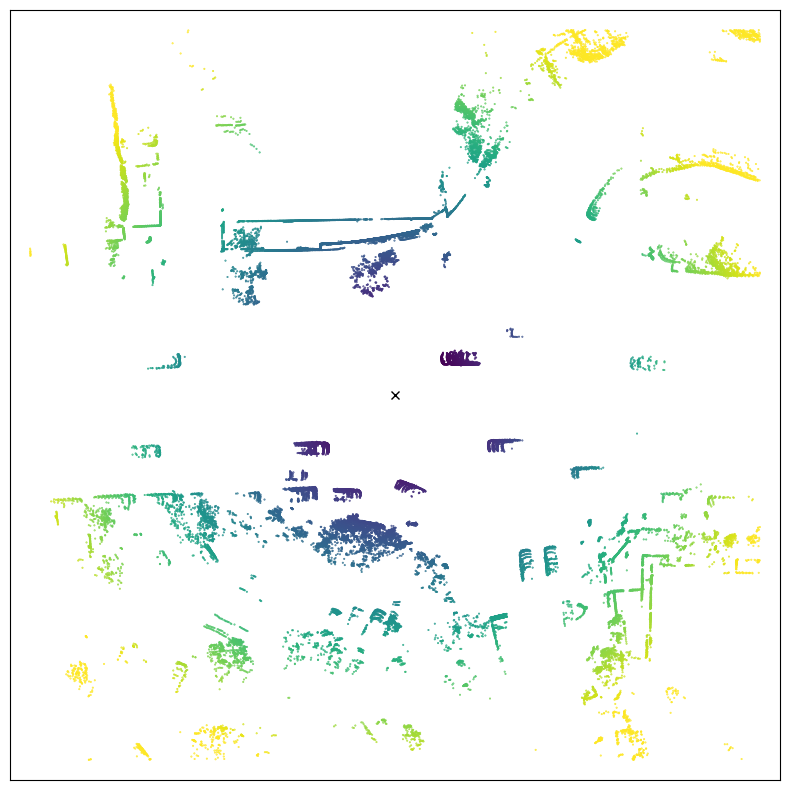

In [40]:
visual_pc(valid_pc.cpu().numpy())

## Visualize the gird features